<Axes: xlabel='Date'>

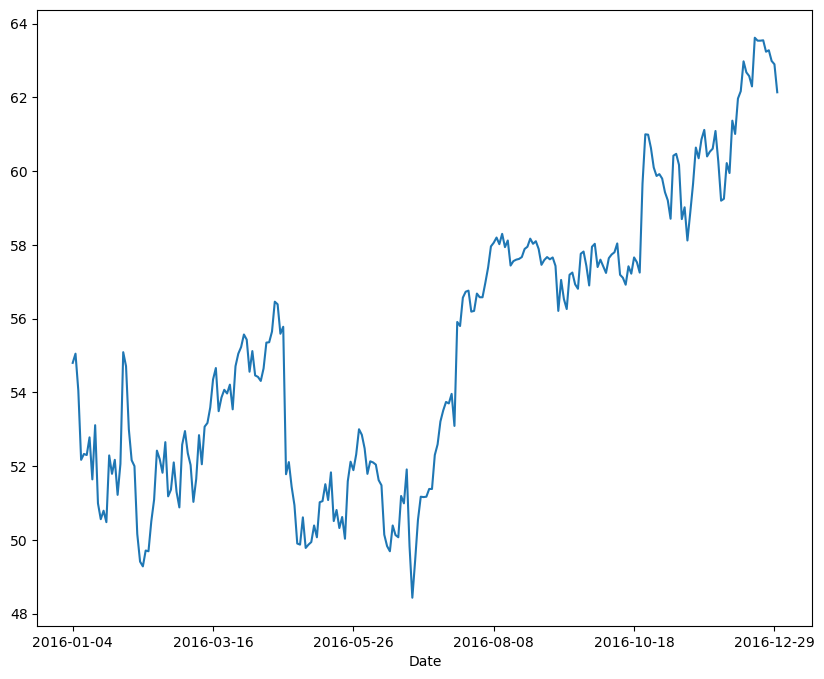

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#data = pd.DataFrame({'City':['Toronto','Vancouver','Montreal']})
##data['City'].unique()

#dum =pd.get_dummies(data)
#dum
#data.shape
#dum.sort_values(by='City_Toronto')

fb = pd.read_csv('data/facebook.csv',index_col=None)
ms = pd.read_csv('data/microsoft.csv',index_col='Date')
#ser = pd.Series(fb['Volume'].unique()).count()
fb.head(30)
#fb.columns[-1]

#fb.iloc[0:200,0:3].plot()
#fb['Close'].plot()

plt.figure(figsize=(10, 8))
# plot only the Close price of 2016 of Microsoft, 1 line 
ms['Close'].loc['2016-01-01':'2016-12-31'].plot()

In [85]:
ms['diff'] = (ms['Open'] - ms['Close'])

In [90]:
ms['dd_close_diff'] = ms['Close'] - ms['Close'].shift(-1)
ms['Profit'] = ms['dd_close_diff']/ms['Close'].shift(-1)
ms.tail()


,Open,High,Low,Close,Adj Close,Volume,diff,dd_open_diff,dd_close_diff,Profit
Date,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-0.449997,-2.270004,-0.023892
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,-1.040001,0.750000,0.007957
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,1.150002,2.480003,0.027021
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,1.860000,3.080001,3.779999,0.042955
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,2.559998,NaN,NaN,NaN


In [95]:
ms['Direction'] = [1 if profit > 0 else -1 for profit in ms['Profit']] ## ms.Select(p => p.Profit > 0 ? 1 : -1);
ms

,Open,High,Low,Close,Adj Close,Volume,diff,dd_open_diff,dd_close_diff,Profit,Direction
Date,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.279999,0.070000,-0.309997,-0.006630,-1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.099998,0.290001,0.429996,0.009281,1
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,0.039997,-0.010002,0.680000,0.014896,1
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.729999,0.400001,-0.579998,-0.012546,-1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,-0.250000,-0.770000,-1.360000,-0.028577,-1
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-0.449997,-2.270004,-0.023892,-1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,-1.040001,0.750000,0.007957,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,1.150002,2.480003,0.027021,1


In [105]:
ms['Rolling_Avrg'] = ms['Close'].rolling(30).mean()
ms

,Open,High,Low,Close,Adj Close,Volume,diff,dd_open_diff,dd_close_diff,Profit,Direction,Rolling_Avrg
Date,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.279999,0.070000,-0.309997,-0.006630,-1,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.099998,0.290001,0.429996,0.009281,1,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,0.039997,-0.010002,0.680000,0.014896,1,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.729999,0.400001,-0.579998,-0.012546,-1,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,-0.250000,-0.770000,-1.360000,-0.028577,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-0.449997,-2.270004,-0.023892,-1,88.484333
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,-1.040001,0.750000,0.007957,1,88.756333
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,1.150002,2.480003,0.027021,1,89.019000


<Axes: xlabel='Date'>

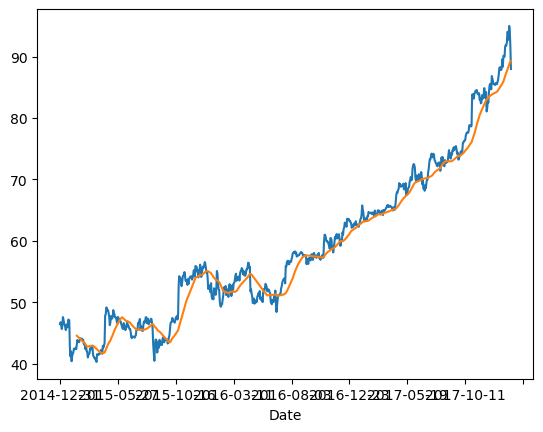

In [106]:
ms['Close'].plot()
ms['Rolling_Avrg'].plot()

In [110]:
ms['MA20'] = ms['Close'].rolling(20).mean()
ms['MA60'] = ms['Close'].rolling(60).mean()
ms['IsLong'] = [1 if fast_signal > slow_signal else 0 for fast_signal, slow_signal in zip(ms['MA20'], ms['MA60'])] 
ms


,Open,High,Low,Close,Adj Close,Volume,diff,dd_open_diff,dd_close_diff,Profit,Direction,Rolling_Avrg,MA20,MA60,IsLong
Date,,,,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.279999,0.070000,-0.309997,-0.006630,-1,NaN,NaN,NaN,0
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.099998,0.290001,0.429996,0.009281,1,NaN,NaN,NaN,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,0.039997,-0.010002,0.680000,0.014896,1,NaN,NaN,NaN,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.729999,0.400001,-0.579998,-0.012546,-1,NaN,NaN,NaN,0
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,-0.250000,-0.770000,-1.360000,-0.028577,-1,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-0.449997,-2.270004,-0.023892,-1,88.484333,89.8285,86.110500,1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,-1.040001,0.750000,0.007957,1,88.756333,90.2815,86.293167,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,1.150002,2.480003,0.027021,1,89.019000,90.6770,86.461833,1


<Axes: xlabel='Date'>

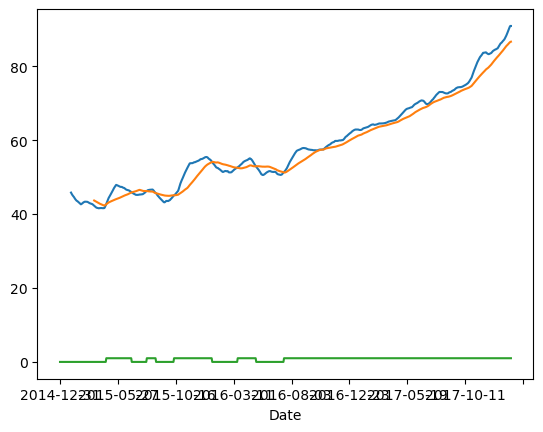

In [113]:
ms['MA20'].plot()
ms['MA60'].plot()
ms['IsLong'].plot()

Receive 257
Lost 284


Date
2014-12-31     0.000000
2015-01-02     0.000000
2015-01-05     0.000000
2015-01-06     0.000000
2015-01-07     0.000000
                ...    
2018-01-30   -33.600005
2018-01-31   -32.850005
2018-02-01   -30.370002
2018-02-02   -26.590003
2018-02-05          NaN
Name: Profit, Length: 780, dtype: float64

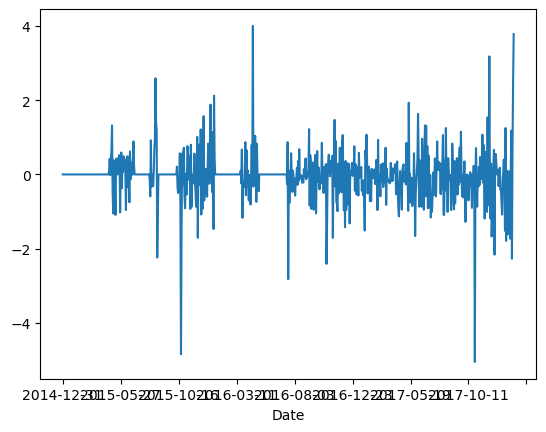

In [127]:
ms['Profit'] = [ dd_c_diff if isLong == 1 else 0 for (dd_c_diff, isLong) in zip(ms['dd_close_diff'], ms['IsLong']) ]
ms['Profit'].plot()
print("Receive " + str((ms['Profit'] > 0).sum()))
print("Lost " + str((ms['Profit']< 0).sum()))
ms['Profit'].cumsum()

<Axes: xlabel='0'>

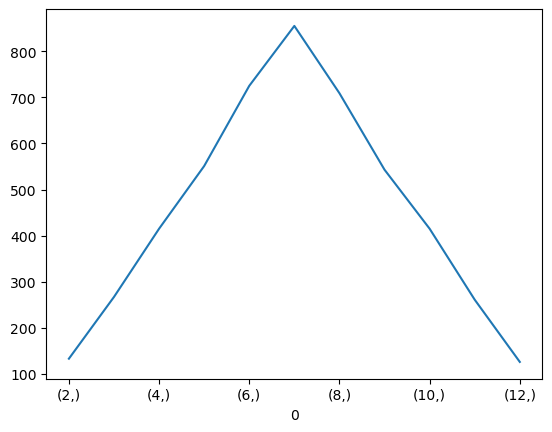

In [299]:
die = pd.DataFrame([1,2,3,4,5,6])
odds = [die.sample(2, replace=True).sum() for _ in range(5000)] 
odds
freq = pd.DataFrame(odds).value_counts().sort_index()
freq.plot()

<Axes: xlabel='0'>

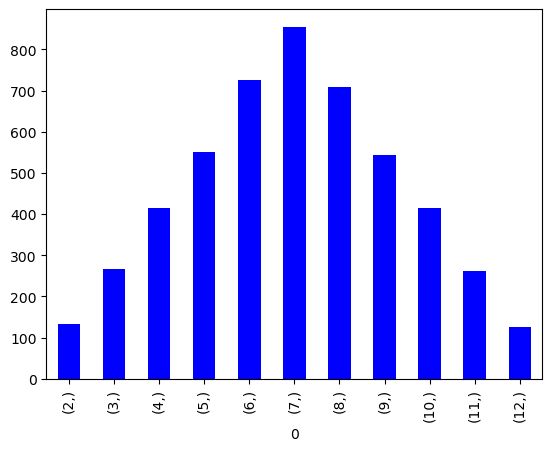

In [300]:
freq.plot(kind="bar", color="blue")

In [304]:
# Valid sums and probabilities for two dice
sums = range(2, 13)
probabilities = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]  # Frequencies of sums
probabilities = [p / 36 for p in probabilities]  # Normalize probabilities

X_distri = pd.DataFrame({'Sum': sums, 'Prob': probabilities})
X_distri.set_index('Sum', inplace=True)

mean = (X_distri.index * X_distri['Prob']).sum()
var = (((X_distri.index - mean)**2) * X_distri['Prob']).sum()

mean, var

(6.999999999999998, 5.833333333333333)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2006-10-02  10.728572  10.838572  10.614285  10.694285   7.239566  178159800
2006-10-03  10.635715  10.707143  10.455714  10.582857   7.164135  197677200
2006-10-04  10.585714  10.780000  10.451428  10.768572   7.289855  207270700
2006-10-05  10.647142  10.880000  10.590000  10.690000   7.236666  170970800
2006-10-06  10.631429  10.720000  10.544286  10.602858   7.177672  116739700


<Axes: xlabel='Date'>

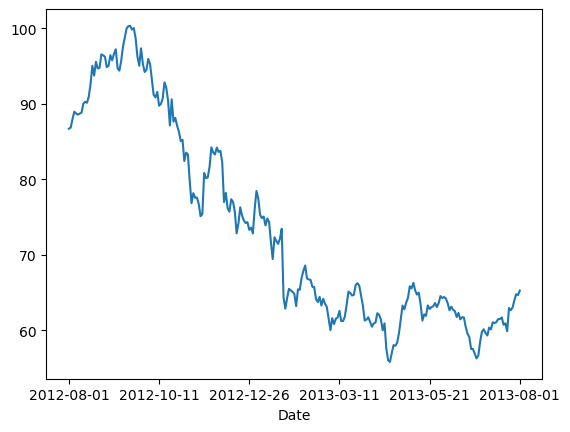

In [26]:
appl = pd.read_csv('data/apple.csv', index_col='Date')
import matplotlib.pyplot as plt
print(appl.head())
appl.loc['2012-08-01':'2013-08-01','Close'].plot()

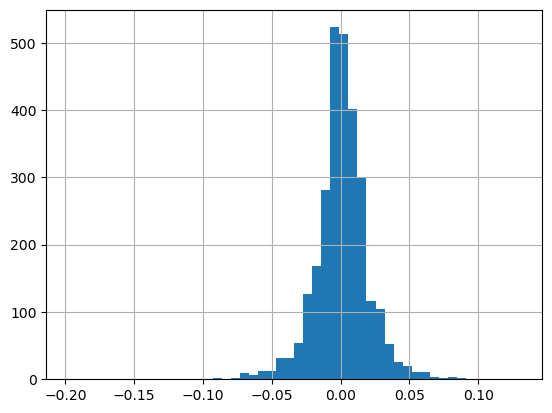

In [59]:
appl['Log_Return'] = np.log(appl['Close']).shift(-1) - np.log(appl['Close'])
bins = appl['Log_Return'].hist(bins=50)
#(appl.loc['2012-08-01':'2013-08-01','Close'].shift(-1)-appl.loc['2012-08-01':'2013-08-01','Close']).hist(bins=50)

In [104]:
from scipy.stats import norm
density = pd.DataFrame()

mu = appl['Log_Return'].mean()
sigma =appl['Log_Return'].std()

density['x'] = np.arange(-0.1,0.1,0.001)
density['pdf'] = norm.pdf(density['x'],mu,sigma)
density['cdf'] = norm.cdf(density['x'],mu,sigma)

Mean: 0.000975467759150088 Std: 0.020045447615854962


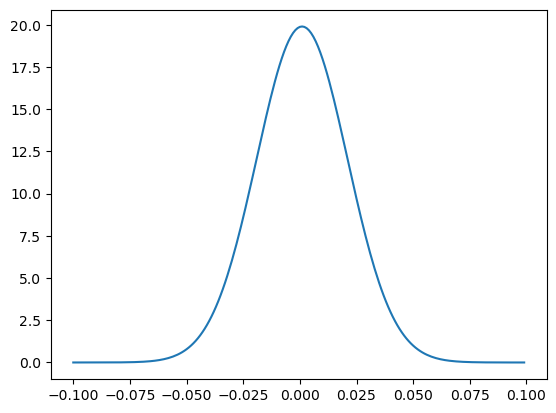

In [105]:
plt.plot(density['x'], density['pdf'])
print("Mean: " + str(mu) + " Std: "+str(sigma))
#plt.plot(density['x'], density['cdf'])

In 5% of obsorvations we have a chance to loose more then 29% on price

In [109]:
appl['Log_Return'].quantile(0.05)

-0.029028109888773246